<a href="https://colab.research.google.com/github/DiegoCorona/TensorFlow2-for-Deep-Learning/blob/main/Week4_Probabilistic_Deep_Learning_with_TensorFlow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfb = tfp.bijectors
print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.6.0
TFP version: 0.13.0


# Variational autoencoders

## Coding tutorials

#### [1. Encoders and decoders](#tutorial1)
#### [2. Minimising Kullback-Leibler divergence](#tutorial2)
#### [3. Maximising the ELBO](#tutorial3)
#### [4. KL divergence layers](#tutorial4)

***
<a class="anchor" id="tutorial1"></a>
## Encoders and decoders

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load Fashion MNIST

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
class_names = np.array(['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress',
                        'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot'])

4431872/4422102 [==============================] - 0s 0us/step


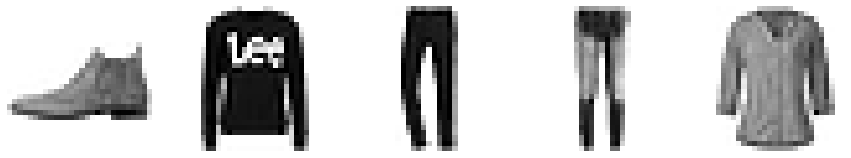

In [ ]:
# Display a few examples
n_examples = 1000
example_images = x_test[0:n_examples]
example_labels = y_test[0:n_examples]

f, axs = plt.subplots(1, 5, figsize=(15, 4))
for j in range(len(axs)):
    axs[j].imshow(example_images[j], cmap='binary')
    axs[j].axis('off')

In [ ]:
# Define the encoder
encoded_dim = 2

encoder = Sequential([
                      Flatten(input_shape = (28, 28)),
                      Dense(256, activation='sigmoid'),
                      Dense(64, activation= 'sigmoid'),
                      Dense(encoded_dim)
])

In [ ]:
# Encode examples before training
pretrain_example_encodings = encoder(example_images).numpy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


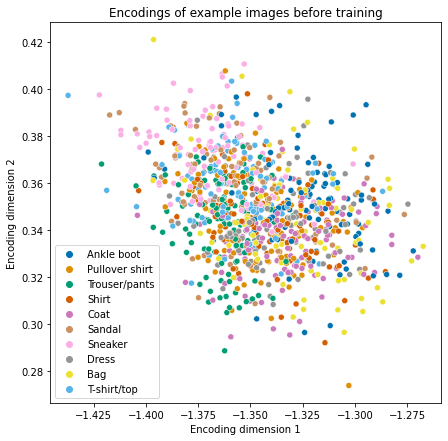

In [ ]:
# Plot encoded examples before training 
f, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(pretrain_example_encodings[:, 0],
                pretrain_example_encodings[:, 1],
                hue=class_names[example_labels], ax=ax,
                palette=sns.color_palette("colorblind", 10));
ax.set_xlabel('Encoding dimension 1'); ax.set_ylabel('Encoding dimension 2')
ax.set_title('Encodings of example images before training');

In [ ]:
# Define the decoder
decoder = Sequential([
                      Dense(64, activation='sigmoid', input_shape = (encoded_dim,)),
                      Dense(256, activation= 'sigmoid'),
                      Dense(28*28, activation='sigmoid'),
                      Reshape((28, 28))
])

In [ ]:
# Compile and fit the model
autoencoder = Model(inputs = encoder.input, outputs = decoder(encoder.output))

# Specify loss - input and output is in [0., 1.], so we can use a binary cross-entropy loss
autoencoder.compile(loss = 'binary_crossentropy' )

# Fit model - highlight that labels and input are the same
autoencoder.fit(x_train, x_train, epochs=10, batch_size=12)

Epoch 1/10
5000/5000 [==============================] - 13s 2ms/step - loss: 0.3691
Epoch 2/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.3331
Epoch 3/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.3273
Epoch 4/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.3247
Epoch 5/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.3229
Epoch 6/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.3217
Epoch 7/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.3207
Epoch 8/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.3199
Epoch 9/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.3191
Epoch 10/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.3186


In [ ]:
# Compute example encodings after training
posttrain_example_encodings = encoder(example_images).numpy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


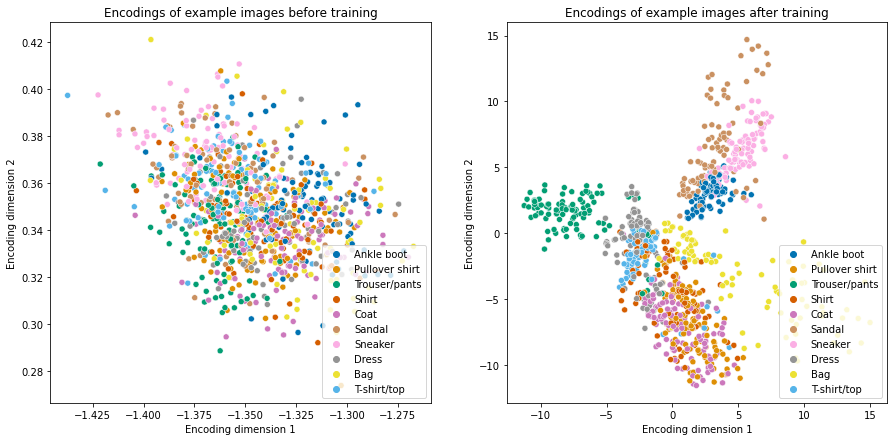

In [ ]:
# Compare the example encodings before and after training

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.scatterplot(pretrain_example_encodings[:, 0],
                pretrain_example_encodings[:, 1],
                hue=class_names[example_labels], ax=axs[0],
                palette=sns.color_palette("colorblind", 10));
sns.scatterplot(posttrain_example_encodings[:, 0],
                posttrain_example_encodings[:, 1],
                hue=class_names[example_labels], ax=axs[1],
                palette=sns.color_palette("colorblind", 10));

axs[0].set_title('Encodings of example images before training');
axs[1].set_title('Encodings of example images after training');

for ax in axs: 
    ax.set_xlabel('Encoding dimension 1')
    ax.set_ylabel('Encoding dimension 2')
    ax.legend(loc='lower right')

In [ ]:
# Compute the autoencoder's reconstructions
reconstructed_example_images = autoencoder(example_images)

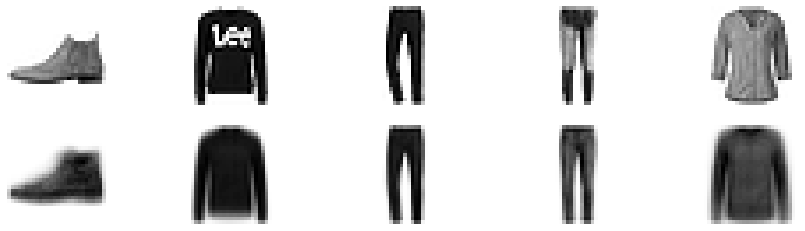

In [ ]:
# Evaluate the autoencoder's reconstructions

f, axs = plt.subplots(2, 5, figsize=(15, 4))
for j in range(5):
    axs[0, j].imshow(example_images[j], cmap='binary')
    axs[1, j].imshow(reconstructed_example_images[j].numpy().squeeze(), cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')

***
<a class="anchor" id="tutorial2"></a>
## Minimising Kullback-Leibler divergence

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

In [5]:
# Define a target distribution, p
tf.random.set_seed(41)
p_mu = [0., 0.]
p_L = tfb.Chain([tfb.TransformDiagonal(tfb.Softplus()),
                tfb.FillTriangular()])(tf.random.uniform([3]))

p = tfd.MultivariateNormalTriL(loc = p_mu, scale_tril = p_L)

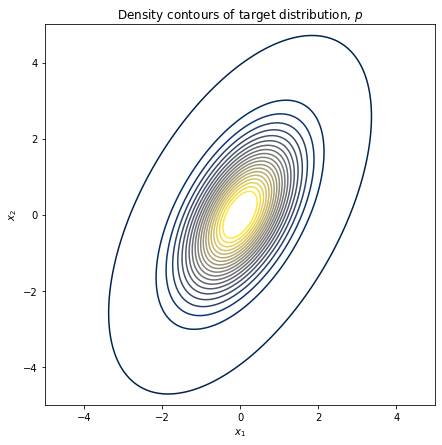

In [6]:
# Plot the target distribution's density contours

def plot_density_contours(density, X1, X2, contour_kwargs, ax=None):
    '''
        Plots the contours of a bivariate TensorFlow density function (i.e. .prob()).
        X1 and X2 are numpy arrays of mesh coordinates.
    '''
    X = np.hstack([X1.flatten()[:, np.newaxis], X2.flatten()[:, np.newaxis]])
    density_values = np.reshape(density(X).numpy(), newshape=X1.shape)
    
    if ax==None:
        _, ax = plt.subplots(figsize=(7, 7))
    
    ax.contour(X1, X2, density_values, **contour_kwargs)
    return(ax)

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(x1, x2)
f, ax = plt.subplots(1, 1, figsize=(7, 7))

# Density contours are linearly spaced
contour_levels = np.linspace(1e-4, 10**(-0.8), 20) # specific to this seed
ax = plot_density_contours(p.prob, X1, X2, 
                           {'levels':contour_levels, 
                            'cmap':'cividis'}, ax=ax)
ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); 
ax.set_title('Density contours of target distribution, $p$')
ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$');

In [12]:
# Initialize an approximating distribution, q, that has diagonal covariance
tf.random.set_seed(41)

q = tfd.MultivariateNormalDiag(loc = tf.Variable(tf.random.normal([2])),
                               scale_diag = tfp.util.TransformedVariable(tf.random.uniform([2]), 
                                                                         bijector= tfb.Exp()))

In [13]:
# Define a function for the Kullback-Leibler divergence
@tf.function
def loss_and_grads(dist_a, dist_b):
  with tf.GradientTape() as tape:
    loss = tfd.kl_divergence(dist_a, dist_b)
    return loss, tape.gradient(loss, dist_a.trainable_variables)

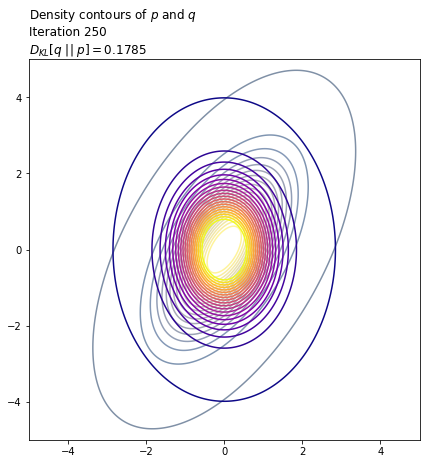

In [14]:
# Run a training loop that computes KL[q || p], updates q's parameters using its gradients

num_train_steps = 250
opt = tf.keras.optimizers.Adam(learning_rate=.01)
for i in range(num_train_steps):
    
    # Compute the KL divergence and its gradients
    q_loss, grads = loss_and_grads(q, p)
    
    # Update the trainable variables using the gradients via the optimizer
    opt.apply_gradients(zip(grads, q.trainable_variables))
    
    # Plot the updated density 
    if ((i + 1) % 10 == 0):
        clear_output(wait=True)
        ax = plot_density_contours(p.prob, X1, X2,
                                   {'levels':contour_levels,
                                    'cmap':'cividis', 'alpha':0.5})
        ax = plot_density_contours(q.prob, X1, X2, 
                                   {'levels':contour_levels,
                                    'cmap':'plasma'}, ax=ax)
        ax.set_title('Density contours of $p$ and $q$\n' +
                     'Iteration ' + str(i + 1) + '\n' +
                      '$D_{KL}[q \ || \ p] = ' + 
                      str(np.round(q_loss.numpy(), 4)) + '$',
                      loc='left')
        plt.pause(.01)

In [15]:
# Re-fit the distribution, this time fitting q_rev by minimising KL[p || q_rev]
tf.random.set_seed(41)

q_rev = tfd.MultivariateNormalDiag(loc = tf.Variable(tf.random.normal([2])),
                               scale_diag = tfp.util.TransformedVariable(tf.random.uniform([2]), 
                                                                         bijector= tfb.Exp()))

In [16]:
# Edit loss_and_grads function
@tf.function
def loss_and_grads(dist_a, dist_b, reverse = True):
  with tf.GradientTape() as tape:
    if not reverse:
      loss = tfd.kl_divergence(dist_a, dist_b)
    else:
      loss = tfd.kl_divergence(dist_b, dist_a)
    return loss, tape.gradient(loss, dist_a.trainable_variables)

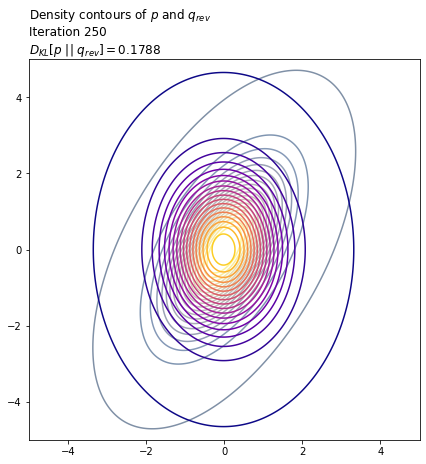

In [17]:
# Re-initialize optimizer, run training loop

opt = tf.keras.optimizers.Adam(learning_rate=.01)
for i in range(num_train_steps):
    # Reverse the KL divergence terms - compute KL[p || q_rev] 
    q_rev_loss, grads = loss_and_grads(q_rev, p, reverse=True)
    
    # Update the trainable variables using the gradients via the optimizer
    opt.apply_gradients(zip(grads, q_rev.trainable_variables))
    
    # Plot the updated density 
    if ((i + 1) % 10 == 0):
        clear_output(wait=True)
        ax = plot_density_contours(p.prob, X1, X2,
                                   {'levels':contour_levels,
                                    'cmap':'cividis', 'alpha':0.5})
        ax = plot_density_contours(q_rev.prob, X1, X2, 
                                   {'levels':contour_levels,
                                    'cmap':'plasma'}, ax=ax)
        ax.set_title('Density contours of $p$ and $q_{rev}$\n' +
                     'Iteration ' + str(i + 1) + '\n' +
                      '$D_{KL}[p \ || \ q_{rev}] = ' + 
                      str(np.round(q_rev_loss.numpy(), 4)) + '$',
                      loc='left')
        plt.pause(.01)

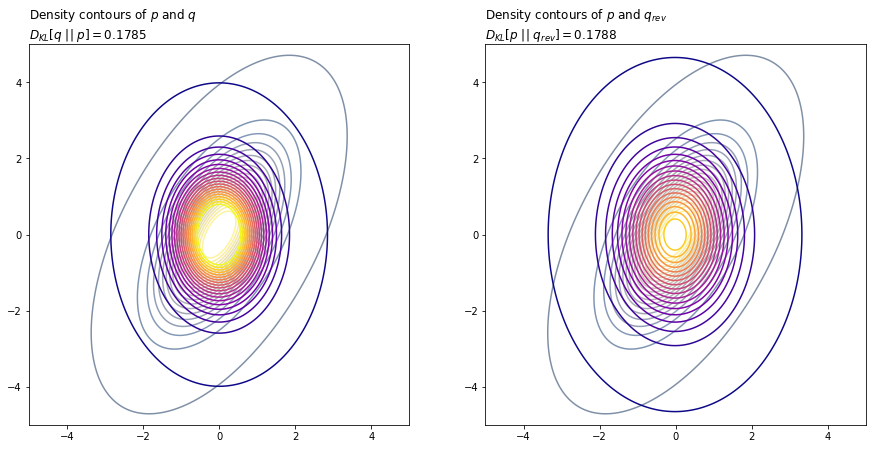

In [18]:
# Plot q and q_rev alongside one another

f, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0] = plot_density_contours(p.prob, X1, X2,
                           {'levels':contour_levels,
                            'cmap':'cividis', 'alpha':0.5}, ax=axs[0])
axs[0] = plot_density_contours(q.prob, X1, X2, 
                           {'levels':contour_levels,
                            'cmap':'plasma'}, ax=axs[0])
axs[0].set_title('Density contours of $p$ and $q$\n' +
              '$D_{KL}[q \ || \ p] = ' + str(np.round(q_loss.numpy(), 4)) + '$',
              loc='left')

axs[1] = plot_density_contours(p.prob, X1, X2,
                           {'levels':contour_levels,
                            'cmap':'cividis', 'alpha':0.5}, ax=axs[1])
axs[1] = plot_density_contours(q_rev.prob, X1, X2, 
                           {'levels':contour_levels,
                            'cmap':'plasma'}, ax=axs[1])
axs[1].set_title('Density contours of $p$ and $q_{rev}$\n' +
              '$D_{KL}[p \ || \ q_{rev}] = ' + str(np.round(q_rev_loss.numpy(), 4)) + '$',
              loc='left');

---
<a class="anchor" id="tutorial3"></a>
## Maximising the ELBO 

Review of terminology:
- $p(z)$ = prior
- $q(z|x)$ = encoding distribution
- $p(x|z)$ = decoding distribution

\begin{align}
\log p(x) &\geq \mathrm{E}_{Z \sim q(z | x)}\big[−\log q(Z | x) + \log p(x, Z)\big]\\
          &= - \mathrm{KL}\big[ \ q(z | x) \ || \ p(z) \ \big] + \mathrm{E}_{Z \sim q(z | x)}\big[\log p(x | Z)\big] 
\end{align}

In [3]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
# Import Fasion MNIST, make it a TensorFlow Dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
example_x = x_test[:16]

batch_size = 64
x_train = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
# Define the encoding distribution, q(z|x)
latent_size = 2
event_shape = (28, 28)

encoder = Sequential([
                      Flatten(input_shape = event_shape),
                      Dense(256, activation= 'relu'),
                      Dense(128, activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(2 * latent_size),
                      tfpl.DistributionLambda(
                          lambda t : tfd.MultivariateNormalDiag(
                              loc = t[..., :latent_size],
                              scale_diag = tf.math.exp(t[..., latent_size:])
                          )
                      )
])

In [9]:
# Pass an example image through the network - should return a batch of MultivariateNormalDiags.
encoder(example_x)  ## Devuelve 16 distribuciones normales bivariadas

<tfp.distributions.MultivariateNormalDiag 'sequential_distribution_lambda_MultivariateNormalDiag' batch_shape=[16] event_shape=[2] dtype=float32>

In [12]:
# Define the decoding distribution, p(x|z)
decoder = Sequential([
                      Dense(32, activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(128, activation= 'relu'),
                      Dense(256, activation= 'relu'),
                      Dense(tfpl.IndependentBernoulli.params_size(event_shape)),
                      tfpl.IndependentBernoulli(event_shape)
])

In [13]:
# Pass a batch of examples to the decoder
decoder(tf.random.normal([16, latent_size]))

<tfp.distributions.Independent 'sequential_2_independent_bernoulli_1_IndependentBernoulli_Independentsequential_2_independent_bernoulli_1_IndependentBernoulli_Bernoulli' batch_shape=[16] event_shape=[28, 28] dtype=float32>

In [14]:
# Define the prior, p(z) - a standard bivariate Gaussian
prior = tfd.MultivariateNormalDiag(loc = tf.zeros(latent_size))

The loss function we need to estimate is

\begin{equation}
-\mathrm{ELBO} = \mathrm{KL}[ \ q(z|x) \ || \ p(z) \ ] - \mathrm{E}_{Z \sim q(z|x)}[\log p(x|Z)]\\
\end{equation}

where $x = (x_1, x_2, \ldots, x_n)$ refers to all observations, $z = (z_1, z_2, \ldots, z_n)$ refers to corresponding latent variables.

Assumed independence of examples implies that we can write this as

\begin{equation}
\sum_j \mathrm{KL}[ \ q(z_j|x_j) \ || \ p(z_j) \ ] - \mathrm{E}_{Z_j \sim q(z_j|x_j)}[\log p(x_j|Z_j)]
\end{equation}

In [15]:
# Specify the loss function, an estimate of the -ELBO
def loss(x, encoding_dist, sampled_decoding_dist, prior):
  return tf.reduce_sum(
      tfd.kl_divergence(encoding_dist, prior) - sampled_decoding_dist.log_prob(x)
  )

In [20]:
# Define a function that returns the loss and its gradients
@tf.function
def get_loss_and_grads(x):
  with tf.GradientTape() as tape:
    encoding_dist = encoder(x)
    sample_z = encoding_dist.sample()
    sampled_decoding_dist = decoder(sample_z)
    current_loss = loss(x, encoding_dist, sampled_decoding_dist, prior)

  grads = tape.gradient(current_loss, 
                        encoder.trainable_variables + decoder.trainable_variables)
  return current_loss, grads

In [21]:
# Compile and train the model
num_epochs = 5
opt = tf.keras.optimizers.Adam()
for i in range(num_epochs):
    for train_batch in x_train:
        current_loss, grads = get_loss_and_grads(train_batch)
        opt.apply_gradients(zip(grads, encoder.trainable_variables
                                       + decoder.trainable_variables))
        
    print('-ELBO after epoch {}: {:.0f}'.format(i+1, current_loss.numpy()))

-ELBO after epoch 1: 8949
-ELBO after epoch 2: 8836
-ELBO after epoch 3: 8802
-ELBO after epoch 4: 8727
-ELBO after epoch 5: 8775


In [29]:
# Connect encoder and decoder, compute a reconstruction
def vae(inputs):
  approx_posterior = encoder(inputs)
  decoding_dist = decoder(approx_posterior.sample())
  return decoding_dist.mean()

example_reconstruction = vae(example_x).numpy().squeeze()

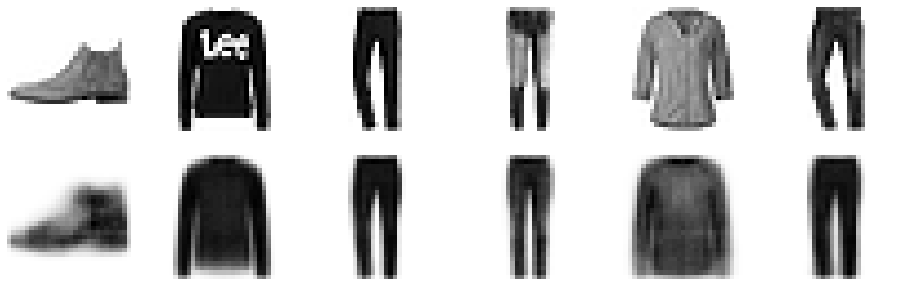

In [30]:
# Plot examples against reconstructions
f, axs = plt.subplots(2, 6, figsize=(16, 5))

for j in range(6):
    axs[0, j].imshow(example_x[j, :, :].squeeze(), cmap='binary')
    axs[1, j].imshow(example_reconstruction[j, :, :], cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')

In [33]:
# Generate an example - sample a z value, then sample a reconstruction from p(x|z)
z = prior.sample(6)
generated_x = decoder(z).mean()

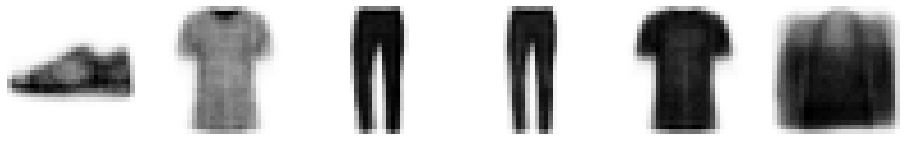

In [34]:
# Display generated_x
f, axs = plt.subplots(1, 6, figsize=(16, 5))
for j in range(6):
    axs[j].imshow(generated_x[j, :, :].numpy().squeeze(), cmap='binary')
    axs[j].axis('off')

In [35]:
# -ELBO estimate using an estimate of the KL divergence

def loss(x, encoding_dist, sampled_decoding_dist,
         prior, sampled_z):
    recon_loss = -sampled_decoding_dist.log_prob(x)
    kl_approx = (encoding_dist.log_prob(sampled_z)
                    - prior.log_prob(sampled_z))
    return tf.reduce_sum(kl_approx + recon_loss)

***
<a class="anchor" id="tutorial4"></a>
# KL divergence layers

In [38]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Import Fashion MNIST

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/256. + 0.5/256
x_test = x_test.astype('float32')/256. + 0.5/256
example_x = x_test[:16]

batch_size = 32
x_train = tf.data.Dataset.from_tensor_slices((x_train, x_train)).batch(batch_size)
x_test = tf.data.Dataset.from_tensor_slices((x_test, x_test)).batch(batch_size)

In [40]:
# Define latent_size and the prior, p(z)
latent_size = 4
prior = tfd.MultivariateNormalDiag(loc = tf.zeros(latent_size))

In [43]:
# Define the encoding distribution using a tfpl.KLDivergenceAddLoss layer
event_shape = (28, 28)
encoder = Sequential([
                      Flatten(input_shape = event_shape),
                      Dense(128, activation = 'relu'),
                      Dense(64, activation = 'relu'),
                      Dense(32, activation = 'relu'),
                      Dense(16, activation = 'relu'),
                      Dense(tfpl.MultivariateNormalTriL.params_size(latent_size)),
                      tfpl.MultivariateNormalTriL(latent_size),
                      tfpl.KLDivergenceAddLoss(prior) ### Estima la divergencia
])


In [44]:
# See how `KLDivergenceAddLoss` affects `encoder.losses`
# encoder.losses before the network has received any inputs
encoder.losses

[<tf.Tensor 'kl_divergence_add_loss/kldivergence_loss/batch_total_kl_divergence:0' shape=() dtype=float32>]

In [45]:
# Pass a batch of images through the encoder
encoder(example_x)

<tfp.distributions.MultivariateNormalTriL 'sequential_3_multivariate_normal_tri_l_MultivariateNormalTriL_MultivariateNormalTriL' batch_shape=[16] event_shape=[4] dtype=float32>

In [46]:
# See how encoder.losses has changed
encoder.losses

[<tf.Tensor: shape=(), dtype=float32, numpy=0.87669456>]

In [47]:
# Re-specify the encoder using `weight` and `test_points_fn`
encoder = Sequential([
                      Flatten(input_shape = event_shape),
                      Dense(128, activation = 'relu'),
                      Dense(64, activation = 'relu'),
                      Dense(32, activation = 'relu'),
                      Dense(16, activation = 'relu'),
                      Dense(tfpl.MultivariateNormalTriL.params_size(latent_size)),
                      tfpl.MultivariateNormalTriL(latent_size),
                      tfpl.KLDivergenceAddLoss(prior, 
                                               use_exact_kl = False, 
                                               weight = 1.5,
                                               test_points_fn = lambda q : q.sample(10),
                                               test_points_reduce_axis = 0) ### Estima la divergencia
])

In [50]:
# Replacing `KLDivergenceAddLoss`  with `KLDivergenceRegularizer` in the previous (probabilistic) layer
divergence_regularizer = tfpl.KLDivergenceRegularizer(prior, use_exact_kl= False,
                                                      test_points_fn = lambda q: q.sample(5),
                                                      test_points_reduce_axis= 0)

encoder = Sequential([
                      Flatten(input_shape = event_shape),
                      Dense(128, activation = 'relu'),
                      Dense(64, activation = 'relu'),
                      Dense(32, activation = 'relu'),
                      Dense(16, activation = 'relu'),
                      Dense(tfpl.MultivariateNormalTriL.params_size(latent_size)),
                      tfpl.MultivariateNormalTriL(latent_size, 
                                                  activity_regularizer = divergence_regularizer)
                      
])

In [51]:
# Specify the decoder, p(x|z)

decoder = Sequential([
    Dense(16, activation='sigmoid', input_shape=(latent_size,)),
    Dense(32, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(2*event_shape[0]*event_shape[1], activation='exponential'),
    Reshape((event_shape[0], event_shape[1], 2)),
    tfpl.DistributionLambda(
        lambda t: tfd.Independent(
            tfd.Beta(concentration1=t[..., 0],
                     concentration0=t[..., 1])
        )
    )
])

In [52]:
# Connect the encoder and decoder to form the VAE
vae = Model(inputs = encoder.inputs, outputs = decoder(encoder.outputs))

In [53]:
# Define a loss that only estimates the expected reconstruction error,
# -E_{Z ~ q(z|x)}[log p(x|Z)]

def log_loss(x_true, p_x_given_z):
  return (-tf.reduce_sum(p_x_given_z.log_prob(x_true)))

In [54]:
# Compile and fit the model

vae.compile(loss = log_loss)

vae.fit(x_train, validation_data= x_test, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 52s 26ms/step - loss: -45005.2344 - val_loss: -50500.9297
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: -53074.5234 - val_loss: -55200.3203
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: -56431.3359 - val_loss: -55080.3281
Epoch 4/10
1875/1875 [==============================] - 46s 24ms/step - loss: -58265.1719 - val_loss: -57433.8555
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: -61612.7070 - val_loss: -61145.6016
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: -64451.8906 - val_loss: -65305.4648
Epoch 7/10
1875/1875 [==============================] - 46s 24ms/step - loss: -66181.3906 - val_loss: -66562.8594
Epoch 8/10
1875/1875 [==============================] - 46s 24ms/step - loss: -67368.3984 - val_loss: -68783.4375
Epoch 9/10
1875/1875 [==============================] - 46s 24ms/step - loss: -66743.851

In [61]:
# Generate an example reconstruction

example_reconstruction = vae(example_x).mean().numpy().squeeze() ## sample // mean

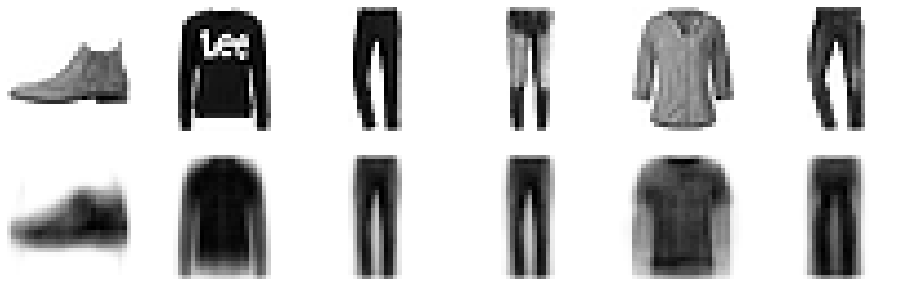

In [62]:
# Plot the example reconstructions

f, axs = plt.subplots(2, 6, figsize=(16, 5))

for j in range(6):
    axs[0, j].imshow(example_x[j, :, :].squeeze(), cmap='binary')
    axs[1, j].imshow(example_reconstruction[j, :, :], cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')